Group 1 result: [[ 130.18382872]
 [2230.41415617]]
Group 2 result: [[ 112.56]
 [4683.88]]
state: California K2-K1=  [[-17.62382872]]


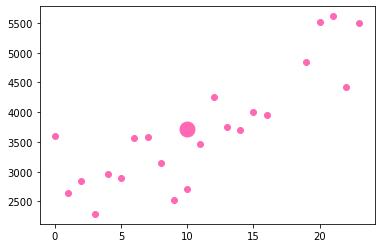

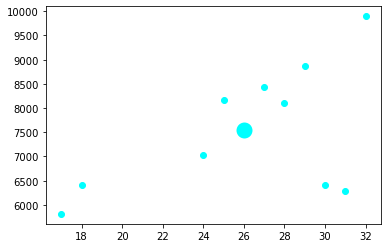

Group 1 result: [[-12.69071025]
 [919.5451708 ]]
Group 2 result: [0, 0]
state: Connecticut K2-K1=  [[12.69071025]]


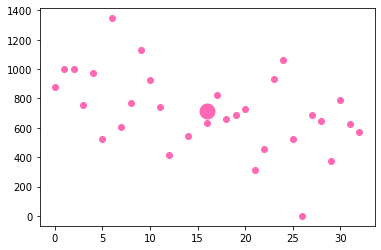

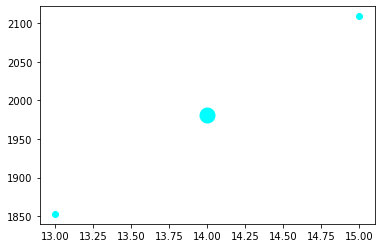

Group 1 result: [[  0.73995755]
 [138.64139662]]
Group 2 result: [[ -0.75]
 [422.75]]
state: Delaware K2-K1=  [[-1.48995755]]


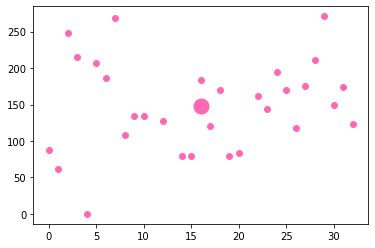

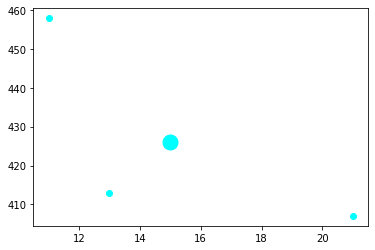

Group 1 result: [[-0.72027972]
 [18.51515152]]
Group 2 result: [[-0.16491228]
 [ 6.00350877]]
state: Hawaii K2-K1=  [[0.55536744]]


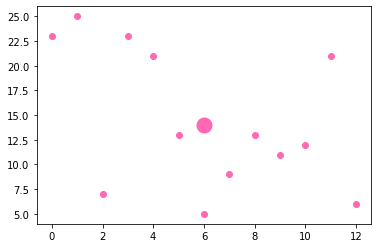

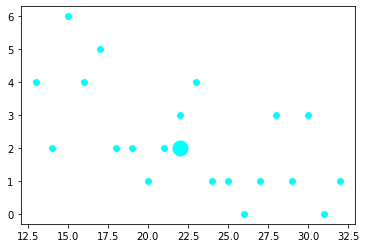

Group 1 result: [[  11.37190424]
 [1787.11840132]]
Group 2 result: [[  52.32483553]
 [2102.87088816]]
state: Illinois K2-K1=  [[40.95293128]]


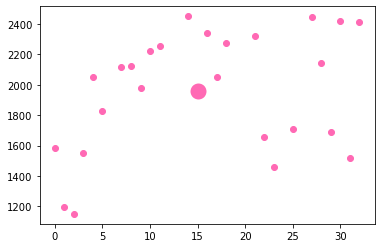

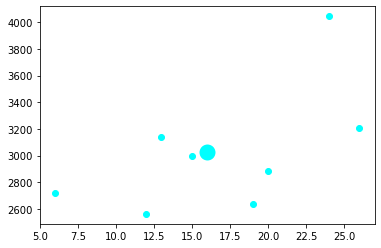

Group 1 result: [[ 16.75434875]
 [441.20831566]]
Group 2 result: [[  0.18732386]
 [131.78562034]]
state: Kansas K2-K1=  [[-16.56702489]]


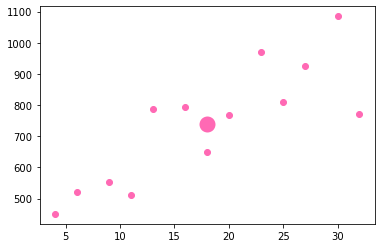

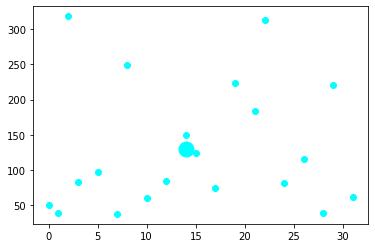

Group 1 result: [[  0.31673646]
 [133.35651662]]
Group 2 result: [[ -7.975]
 [448.375]]
state: Kentucky K2-K1=  [[-8.29173646]]


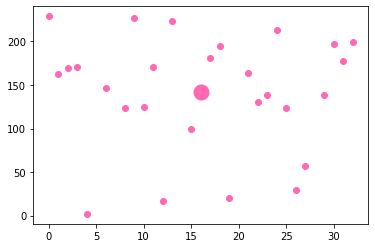

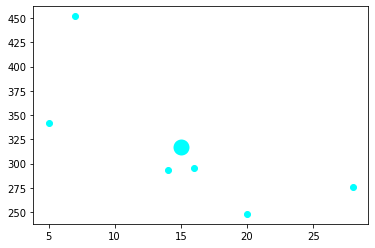

Group 1 result: [[ 0.59838169]
 [17.17689168]]
Group 2 result: [[  4.66666667]
 [-71.33333333]]
state: Maine K2-K1=  [[4.06828498]]


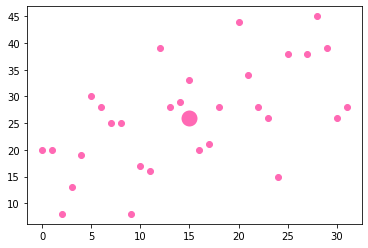

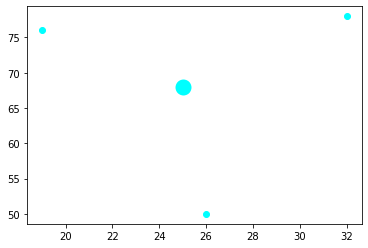

Group 1 result: [[  6.30733352]
 [560.17848896]]
Group 2 result: [[ 13.8326572 ]
 [713.07200811]]
state: Maryland K2-K1=  [[7.52532368]]


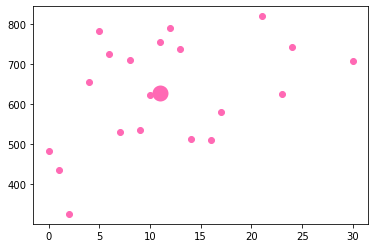

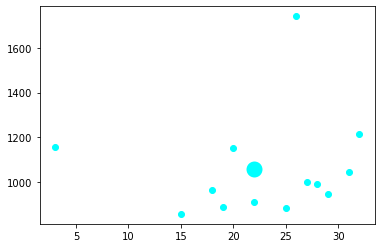

Group 1 result: [[ -40.18064516]
 [2047.6516129 ]]
Group 2 result: [0, 0]
state: Massachusetts K2-K1=  [[40.18064516]]


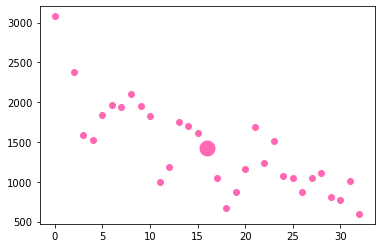

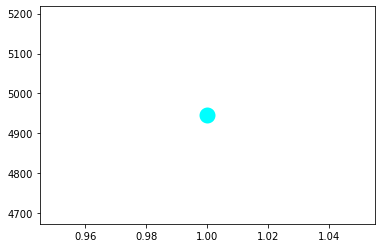

Group 1 result: [[  8.23306452]
 [176.65080645]]
Group 2 result: [0, 0]
state: Michigan K2-K1=  [[-8.23306452]]


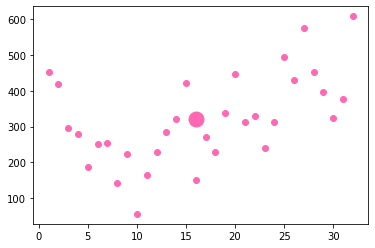

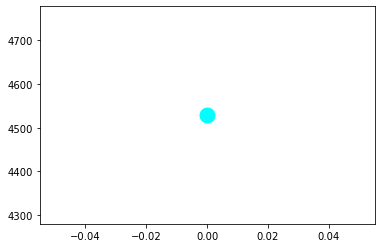

Group 1 result: [[  8.35577396]
 [616.31941032]]
Group 2 result: [[ 12.61980268]
 [221.27766032]]
state: Nevada K2-K1=  [[4.26402872]]


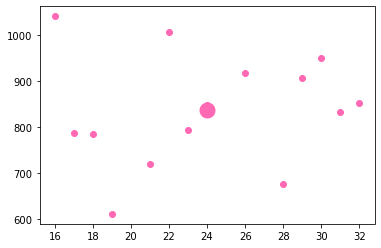

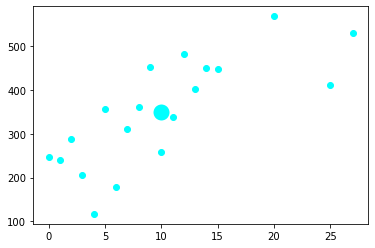

Group 1 result: [[   7.43586738]
 [2275.53633624]]
Group 2 result: [[-3.19938176e+00]
 [ 3.73477935e+03]]
state: New Jersey K2-K1=  [[-10.63524914]]


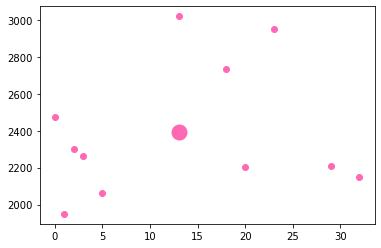

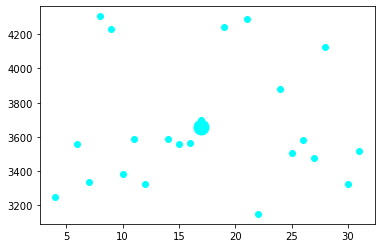

Group 1 result: [[  0.20546616]
 [104.15693487]]
Group 2 result: [[  0.97993332]
 [158.62496913]]
state: New Mexico K2-K1=  [[0.77446716]]


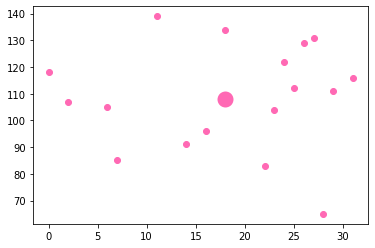

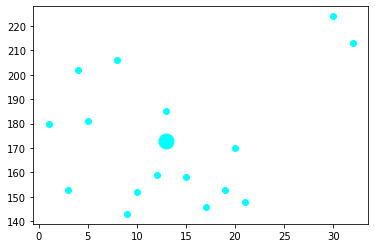

Group 1 result: [[-177.4754717 ]
 [8605.60188679]]
Group 2 result: [[ -14.83897658]
 [9268.86265275]]
state: New York K2-K1=  [[162.63649512]]


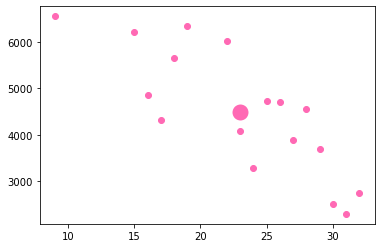

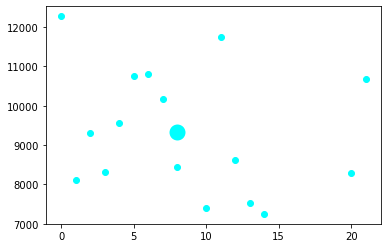

Group 1 result: [[  15.4037295 ]
 [1523.97461245]]
Group 2 result: [[  15.06213266]
 [1072.02183039]]
state: North Carolina K2-K1=  [[-0.34159684]]


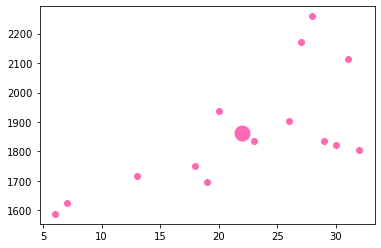

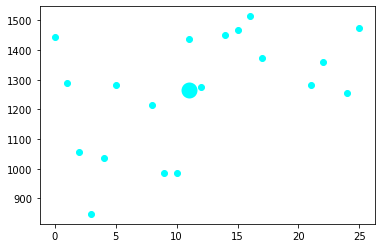

Group 1 result: [[  4.13130156]
 [137.48785518]]
Group 2 result: [[  0.35891298]
 [328.82188116]]
state: Oregon K2-K1=  [[-3.77238858]]


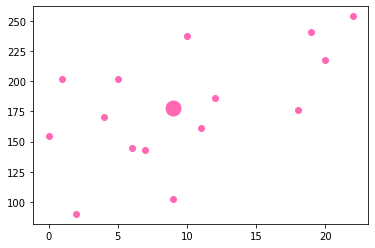

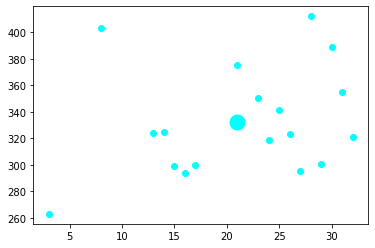

Group 1 result: [[  -8.92009176]
 [1343.75520933]]
Group 2 result: [[5.80650714e-01]
 [1.71158306e+03]]
state: Pennsylvania K2-K1=  [[9.50074248]]


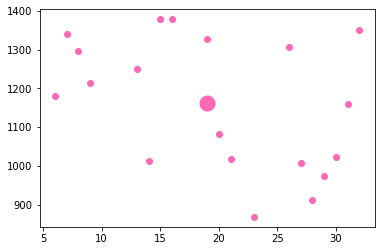

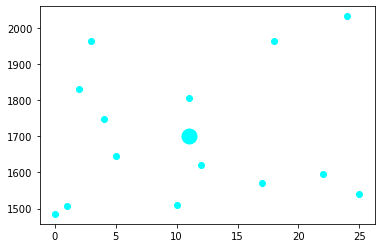

Group 1 result: [[ -2.20617958]
 [266.2613544 ]]
Group 2 result: [[ -3.30247286]
 [186.81453559]]
state: Rhode Island K2-K1=  [[-1.09629328]]


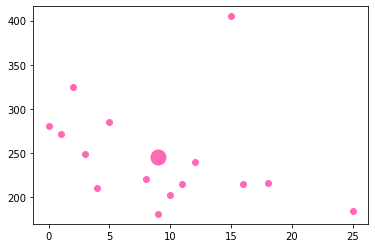

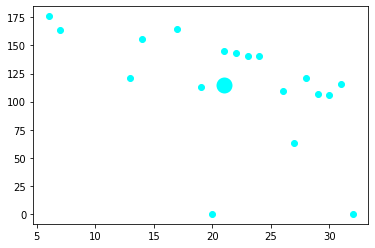

Group 1 result: [[  97.3471255 ]
 [5062.23487642]]
Group 2 result: [[  62.26006619]
 [8900.3168781 ]]
state: Texas K2-K1=  [[-35.08705931]]


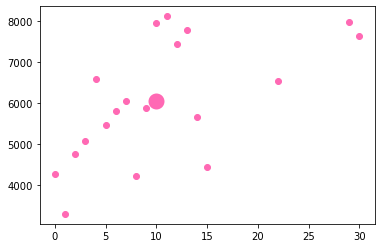

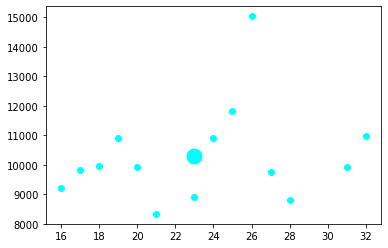

Group 1 result: [[-11.13278816]
 [853.98948598]]
Group 2 result: [[  -6.11191099]
 [1265.46531414]]
state: Virginia K2-K1=  [[5.02087717]]


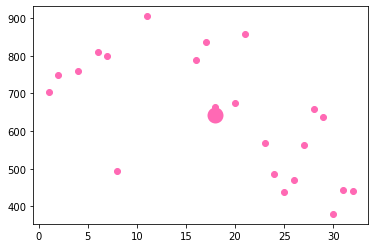

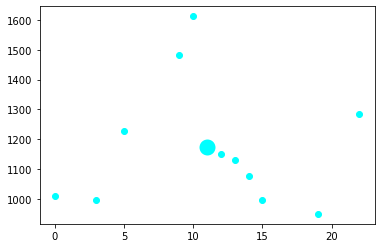

Group 1 result: [[ 11.36952011]
 [342.58259822]]
Group 2 result: [0, 0]
state: Washington K2-K1=  [[-11.36952011]]


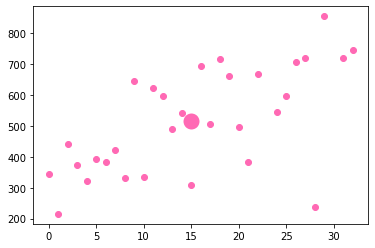

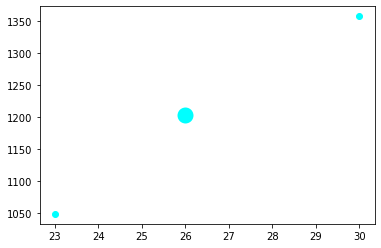

Group 1 result: [[ 1.6759688 ]
 [47.57860717]]
Group 2 result: [[-9.93605509e-02]
 [ 1.57666995e+02]]
state: West Virginia K2-K1=  [[-1.77532935]]


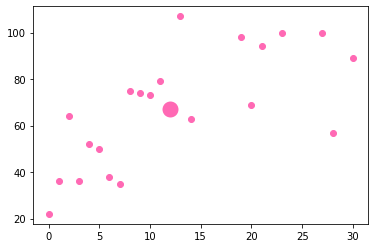

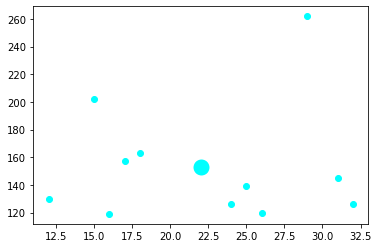

In [1]:
import numpy as np
from numpy import *;
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv
import pandas as pd
 


# read the original data file
df=pd.read_csv("mask.csv",delimiter=",")
df['Date'] = pd.to_datetime(df['Date'])
ca_pre = df[df['state'] == 'Connecticut']
state = df['state'].unique()
i1=0


# calculate the distance between two vectors
def distance(e1, e2):
  return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2)
 
    
# calculate the centre of each cluster
def means(arr):
  return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])
 
# looking for the element farthest to A in the array, initializing the cluster centre
def farthest(k_arr, arr):
  f = [0, 0]
  max_d = 0
  for e in arr:
    d = 0
    for i in range(k_arr.__len__()):
      d = d + np.sqrt(distance(k_arr[i], e))
    if d > max_d:
      max_d = d
      f = e
  return f
 
# looking for the element closest to A in the array
def closest(a, arr):
  c = arr[1]
  min_d = distance(a, arr[1])
  arr = arr[1:]
  for e in arr:
    d = distance(a, e)
    if d < min_d:
      min_d = d
      c = e
  return c


# using LES algorithm from HW2 to fit the curve
def Q1_1(X,Y):
    t=np.ones(len(X))
    h = np.vstack((X,t)).T
    Y = np.mat(Y)
    try:        # to avoid the singularity matrix problem caused by too few single group data after classification
        A=np.matmul(np.matmul(inv(np.matmul(h.T,h)),h.T),Y.T)   
        v=Y-np.matmul(h,A)
    except:
        return [0,0]
    else:
        return A


# kmeans clustering and showing the result
def kmeans(ca_pre,state_name):
  x=[i for i in range(0,len(ca_pre))]
  A  =  np.column_stack((x,ca_pre['cases']))
  arr = A   # import original dataset
 
  ## initialize the cluster center and cluster container
  m = 2
  r = np.random.randint(arr.__len__() - 1)
  k_arr = np.array([arr[r]])
  cla_arr = [[]]
  for i in range(m-1):
    k = farthest(k_arr, arr)
    k_arr = np.concatenate([k_arr, np.array([k])])
    cla_arr.append([])
 
  ## iterative clustering
  n = 50
  cla_temp = cla_arr
  for i in range(n):  # do n iterations
    for e in arr:  # clusters each element in the set to the nearest array
      ki = 0    # assume that the first one is closest
      min_d = distance(e, k_arr[ki])
      for j in range(1, k_arr.__len__()):
        if distance(e, k_arr[j]) < min_d:  # find a closer cluster center
          min_d = distance(e, k_arr[j])
          ki = j
      cla_temp[ki].append(e)
    # update the cluster centre during iteration
    for k in range(k_arr.__len__()):
      if n - 1 == i:
        break
      k_arr[k] = means(cla_temp[k])
      cla_temp[k] = []
 
  ## visualization
  col = ['HotPink', 'Aqua']
  Xi  =  []
  Yi  =  []
  Xi1 =  []
  Yi1 =  []
  cla0 = np.mat(cla_arr[0])
  for i in range(len(cla0)):
    if   i !=  0 :
        Xi.append(float(cla0[i,0]))
        Yi.append(float(cla0[i,1]))
  
  A1 = Q1_1(Xi,Yi)
  print("Group 1 result:",A1) # the slope and the intercept of group1
  
  cla1 = np.mat(cla_arr[1])
  for i in range(len(cla1)):
    if   i !=  0 :
        Xi1.append(float(cla1[i,0]))
        Yi1.append(float(cla1[i,1]))
  
  A2 = Q1_1(Xi1,Yi1)
  print("Group 2 result:",A2) # the slope and the intercept of group2
  # write the results to a text document for further analyzing
  with open('infection rate kmeans.txt','a',encoding='utf-8') as f:
    f.write("state:")
    f.write(state_name)
    f.write("K2-K1= ")
    f.write(str(A2[0]-A1[0]))
    f.write('\r\n')
  print("state:",state_name,"K2-K1= ",A2[0]-A1[0])
  
  for i in range(m):
    plt.scatter(k_arr[i][0], k_arr[i][1], linewidth=10, color=col[i])
    plt.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]], color=col[i])
    plt.show()
    

    
def cal(state_name,df):
    states_pre = df[df['state'] == state_name]  #filter for state (before)
    kmeans(states_pre,state_name)
    
    
    


for s in state:
    cal(s,df)
    i1=i1+1
    
